### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**: Ayush Kumar

**Student ID**: 20724315

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [111]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from platform import python_version
print(python_version())

3.8.10


In [112]:
#Loading the Dataset
data = pd.read_csv("TEMG4940C - Assignment Dataset.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(10) # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [113]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000




---



> Q0. Generate Y - Predictor Value

In [114]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

data['Y-Predictor'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']


#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

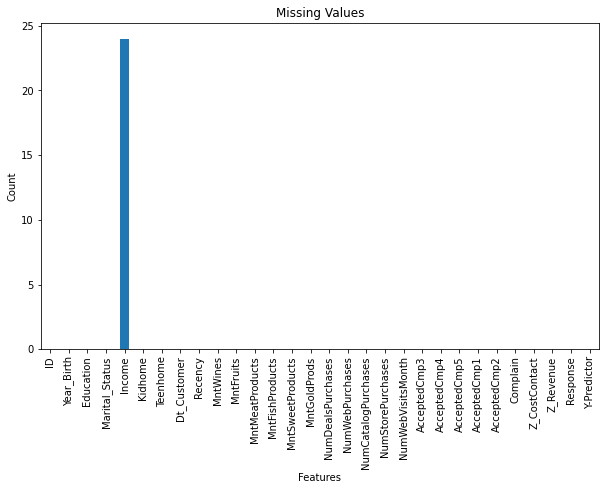

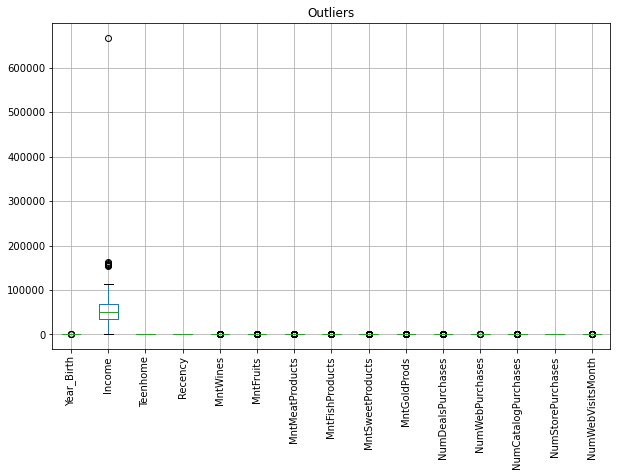

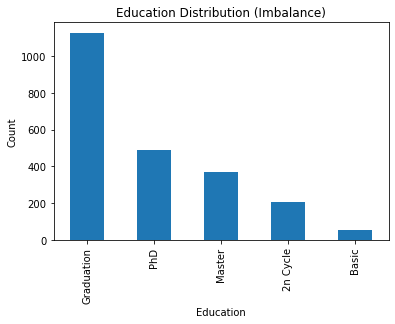

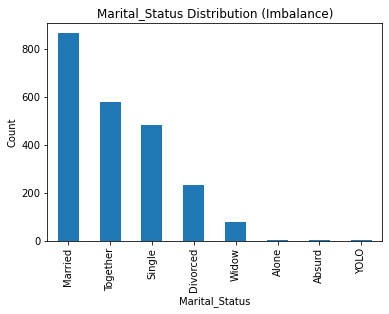

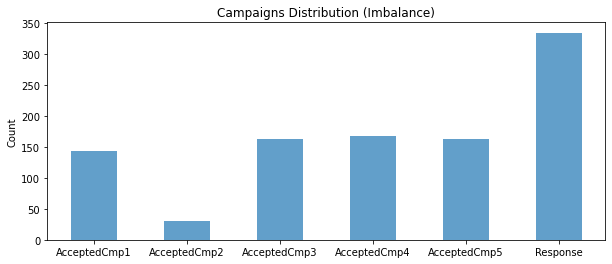

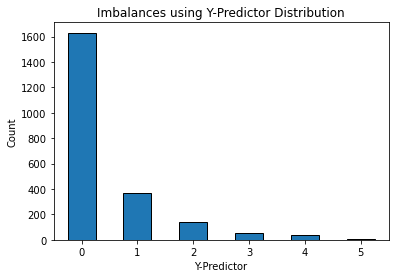

In [115]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Check for missing values
missing_values = data.isnull().sum()

# Visualize missing values using bar graph
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

# Check for outliers
numeric_features = ['Year_Birth', 'Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
data[numeric_features].boxplot()
plt.title('Outliers')
plt.xticks(rotation=90)
plt.show()

#Check for imbalances in the categorical variables
categorical_columns = ['Education', 'Marital_Status']

category_counts = {}
for column in categorical_columns:
    category_counts[column] = data[column].value_counts()

#Visualize the imbalances in the categorical variables using bar graphs
for column, counts in category_counts.items():
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Distribution (Imbalance)')
    plt.show()

#Check for imbalances in the camapign columns
campaign_sums = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()
    
#Visualize the imbalance in the campaign columns using bar graphs
plt.figure(figsize=(10, 4))
campaign_sums.plot(kind='bar', alpha=0.7)
plt.ylabel('Count')
plt.title('Campaigns Distribution (Imbalance)')
plt.xticks(rotation=0)
plt.show()

#Visualize imbalances using the current counts of the Y-Predictor Column 

plt.figure(figsize=(6, 4))
data['Y-Predictor'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Y-Predictor')
plt.ylabel('Count')
plt.title('Imbalances using Y-Predictor Distribution')
plt.xticks(rotation=0)
plt.show()


>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

In [116]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT

#(i) Missing Values- Drop the 24 Rows with missing values because that is just 1% of the total data, so the data set is not affected much. It also has extreme outliers, so filling with the mean is not feasible.
data = data.dropna()

#(ii) Outliers- Use Quartile Bounds to remove values that are below the lower bound, and above the upper bound so that the bulk of data is grouped together

def handle_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].apply(lambda x: max(min(x, upper_bound), lower_bound))

numerical_columns = ['Year_Birth', 'Income', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
for column in numerical_columns:
    handle_outliers(column)

data.describe()

data.to_csv('data.csv', index=False)

> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Dropped Rows with Missing Values | Only 24 out of 2240 rows (~1%) have missing values so the data frame is not affected much by dropping the rows with missing values. It also has extreme outliers, so using the mean is not entirely reliable |
|Handling Missing Values| Used the Interquartile range | Outliers outside the interquartile range can be ignored because IQR helps set up a "fence" that ignores drastic variances|


>  Q1d. Plot 3 or more types of charts over all columns of data

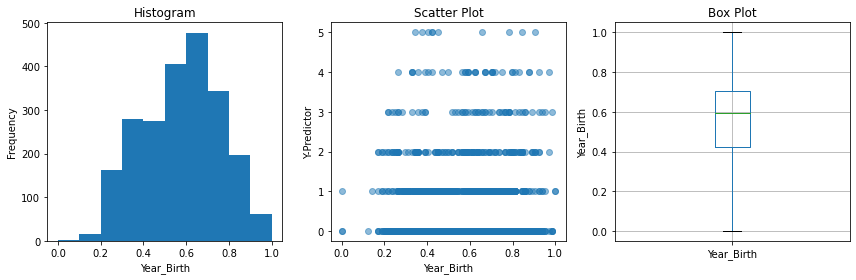

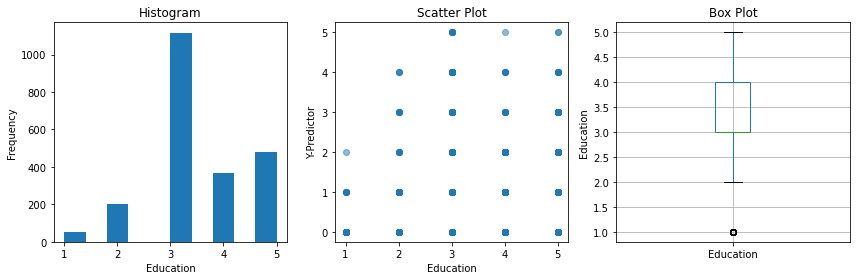

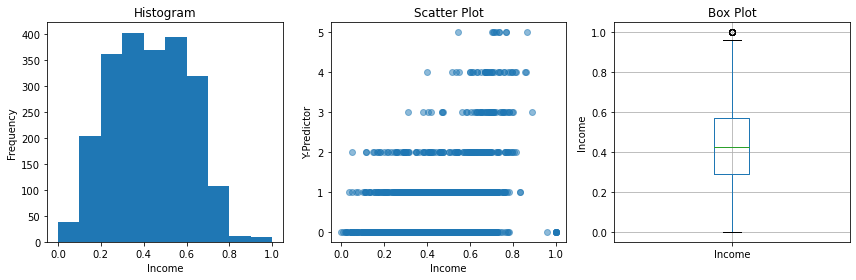

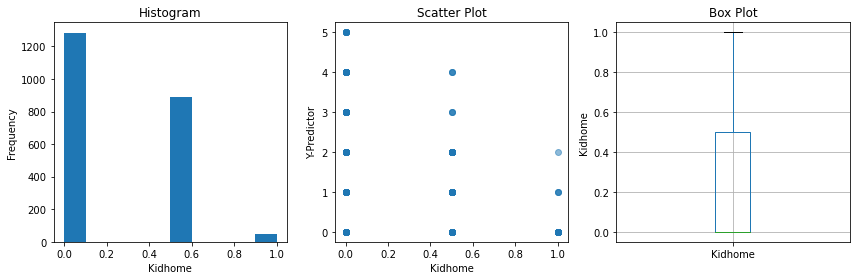

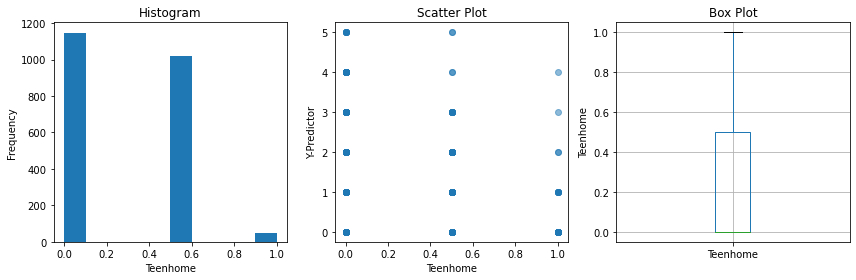

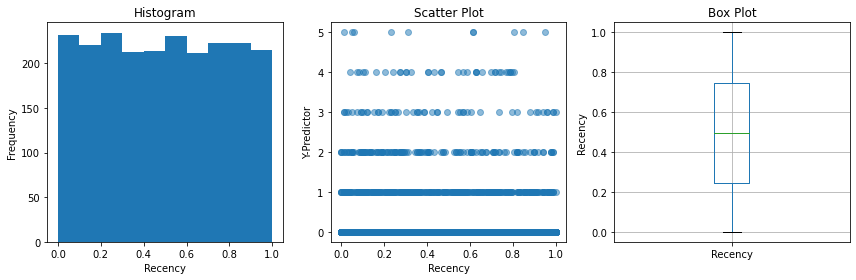

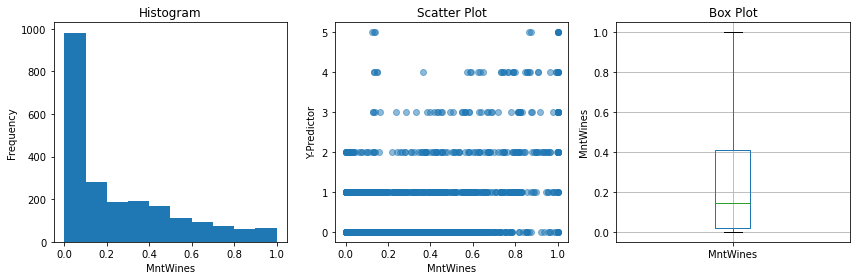

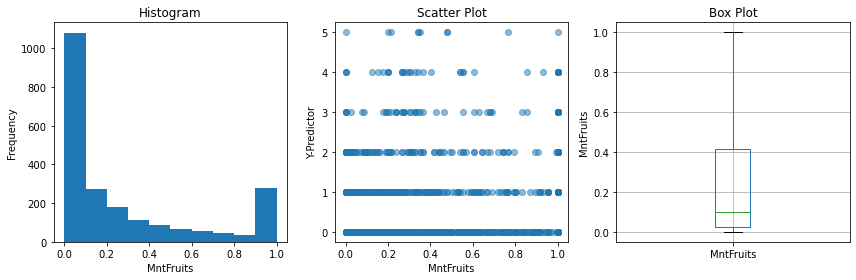

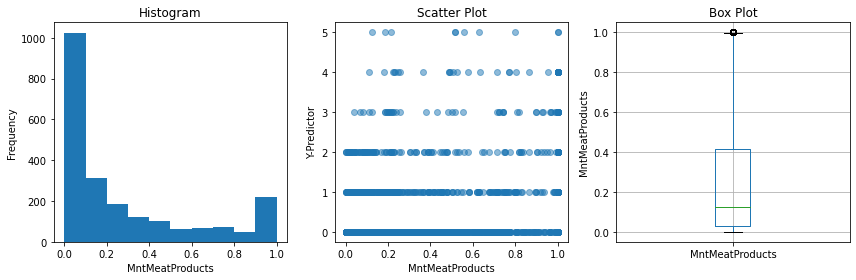

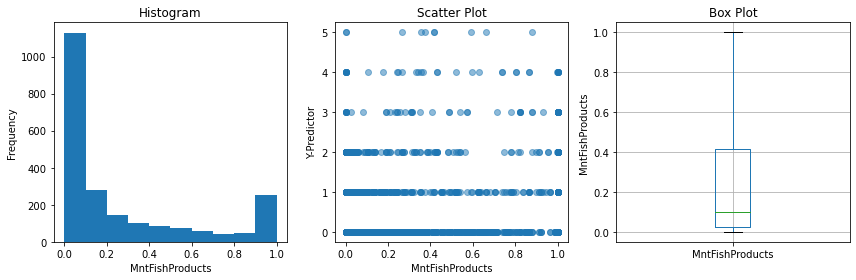

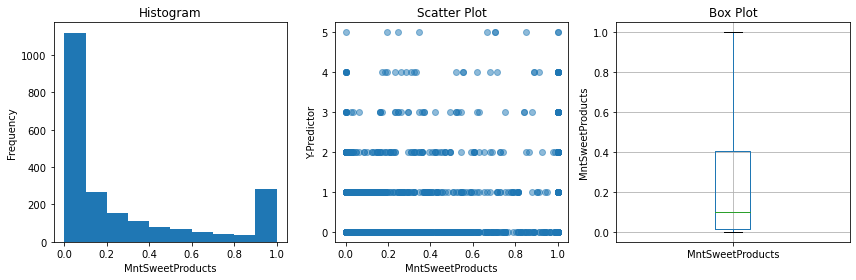

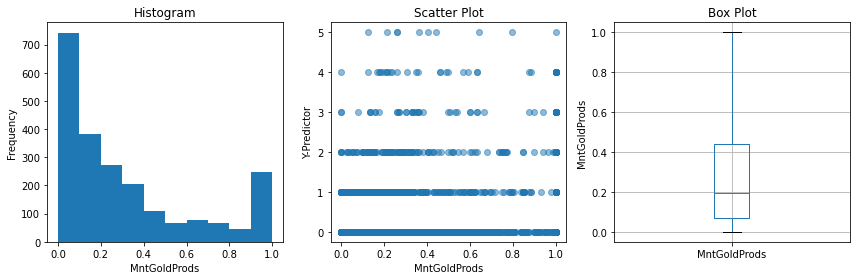

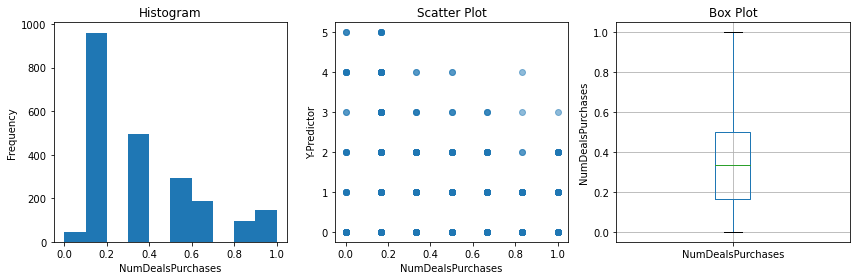

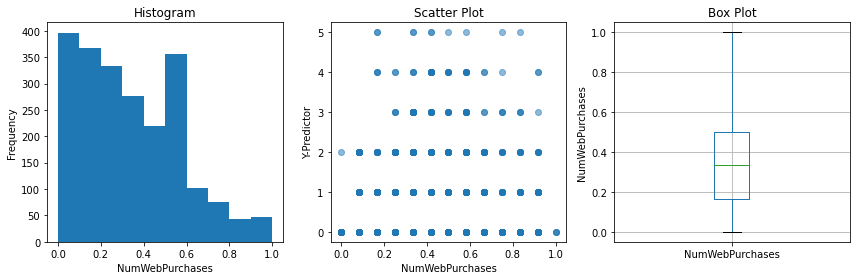

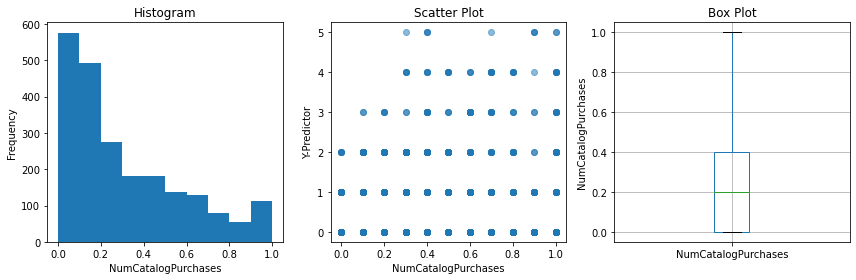

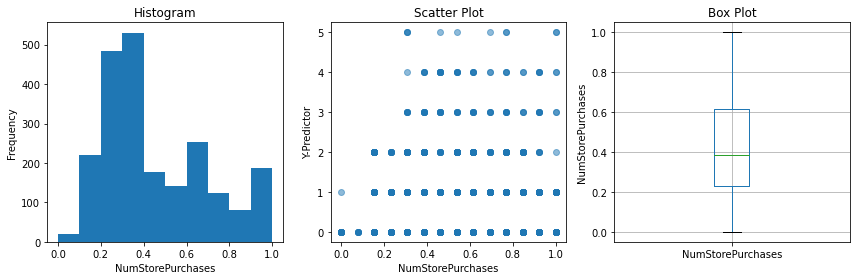

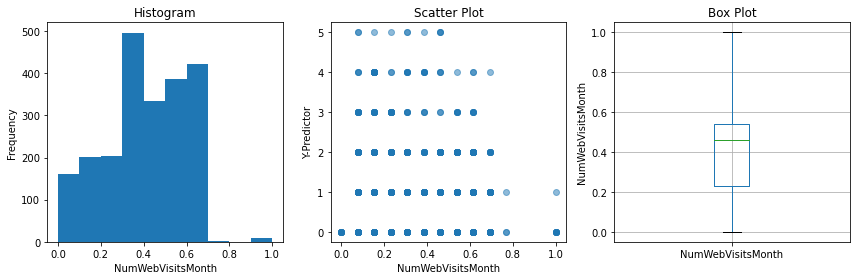

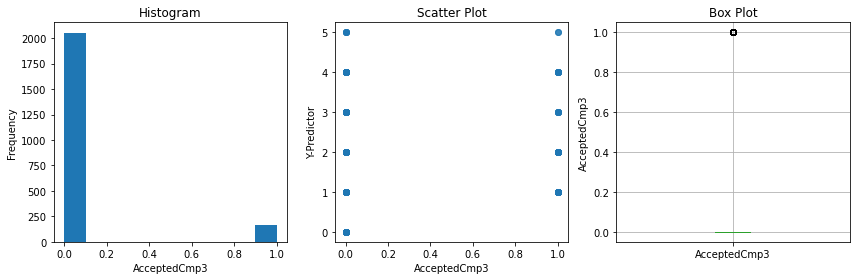

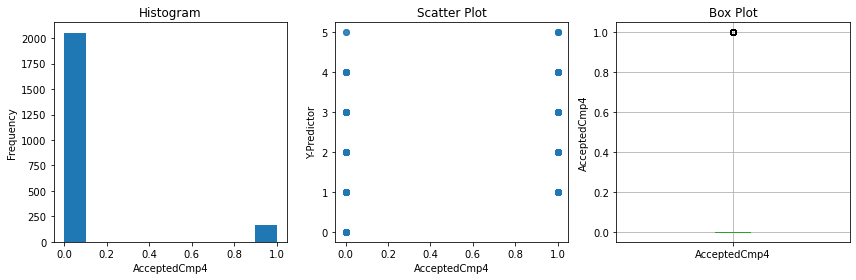

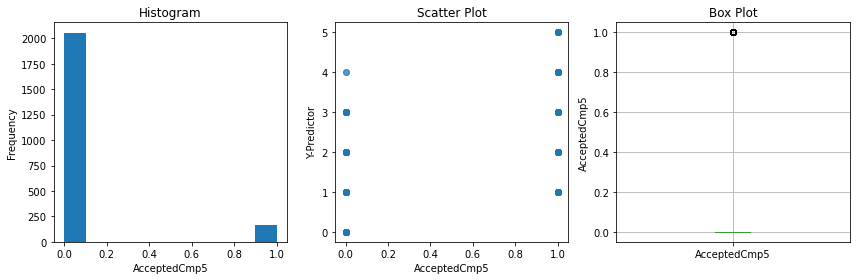

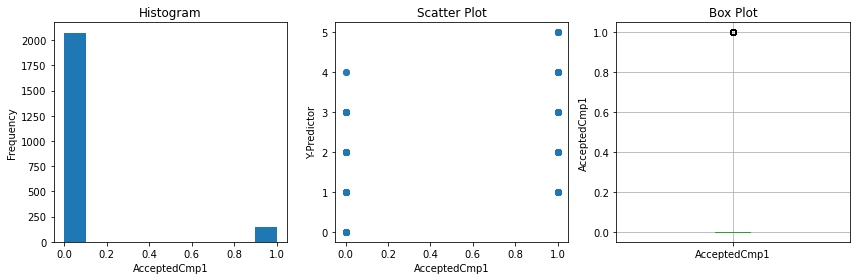

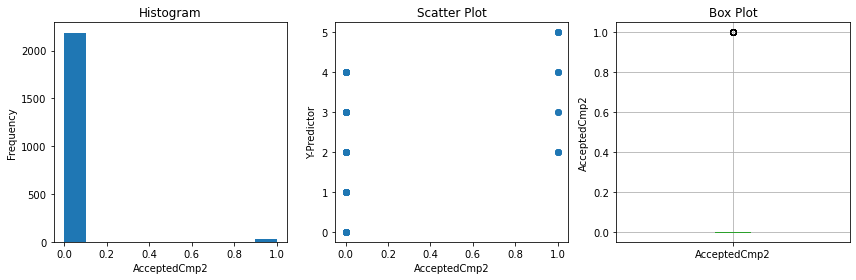

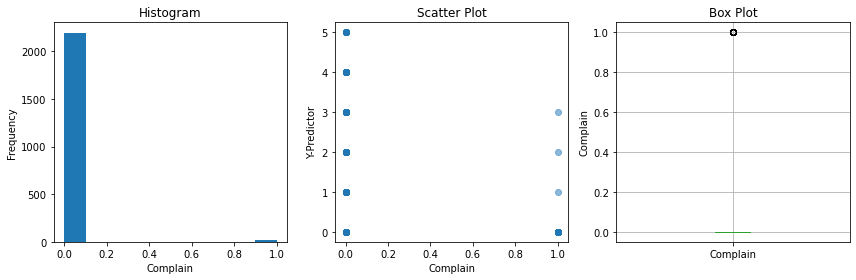

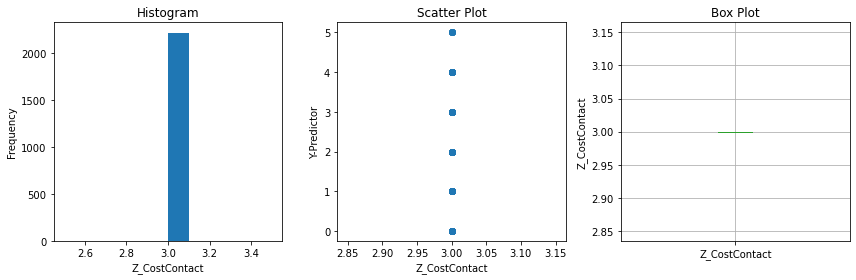

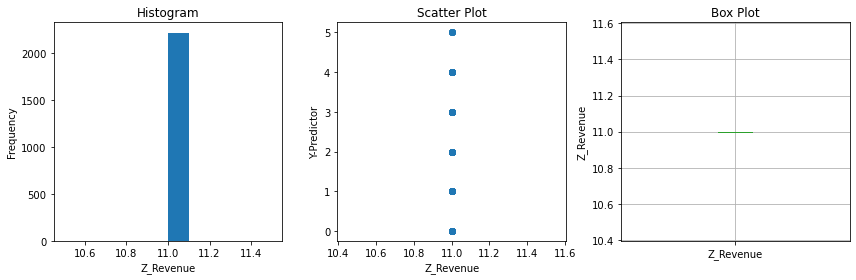

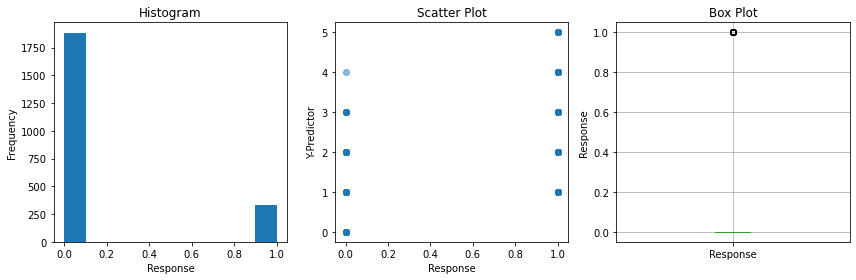

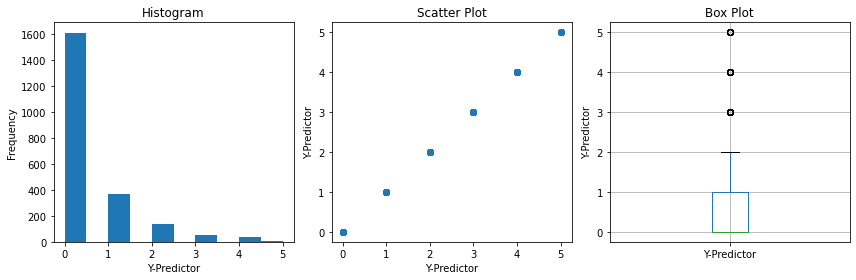

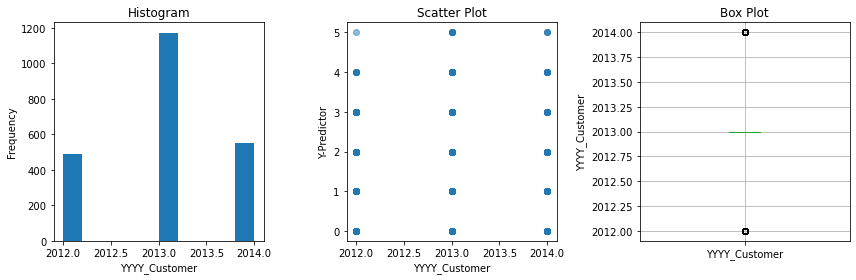

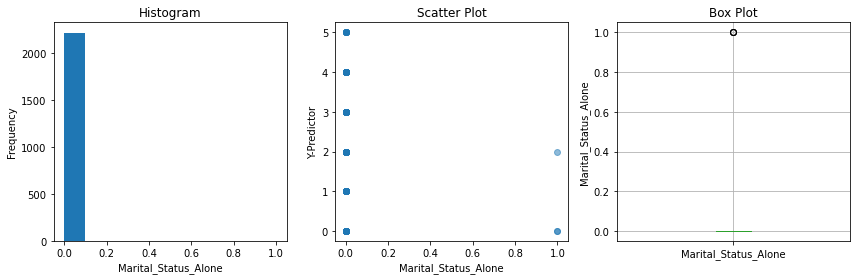

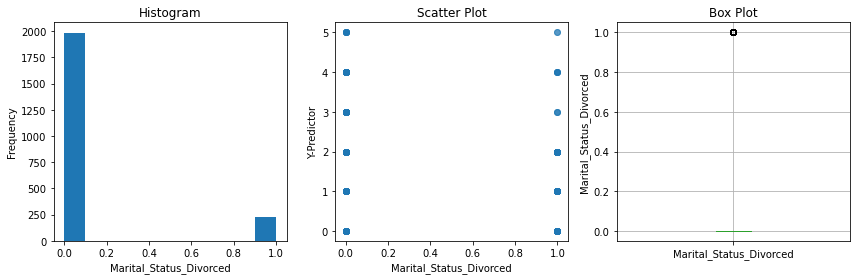

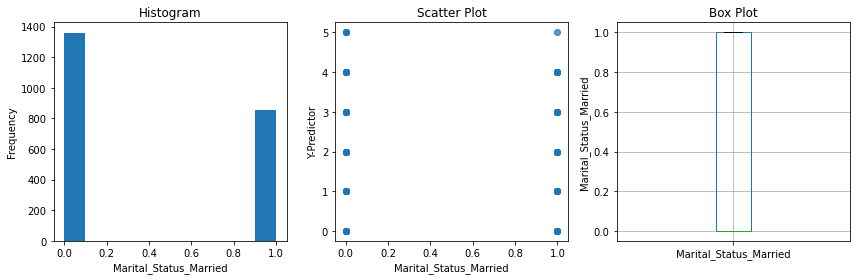

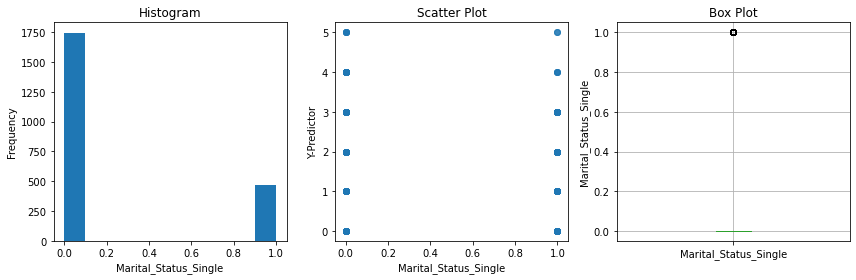

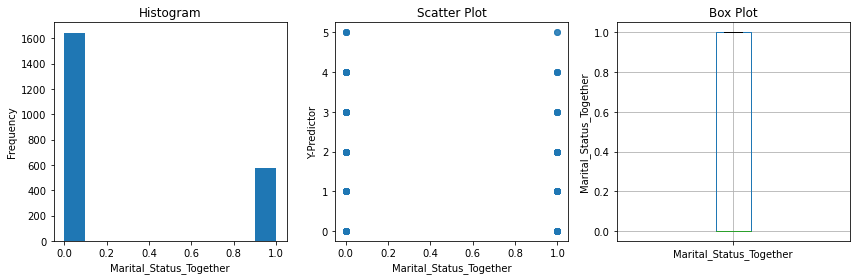

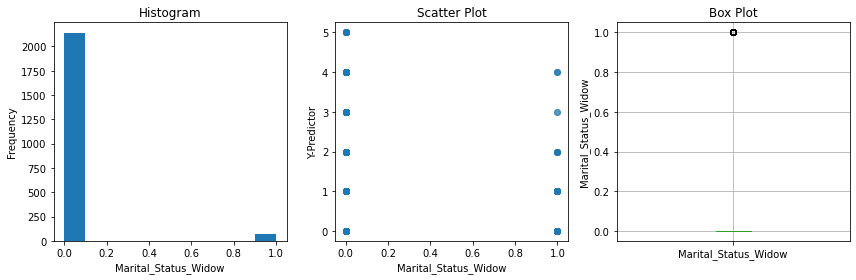

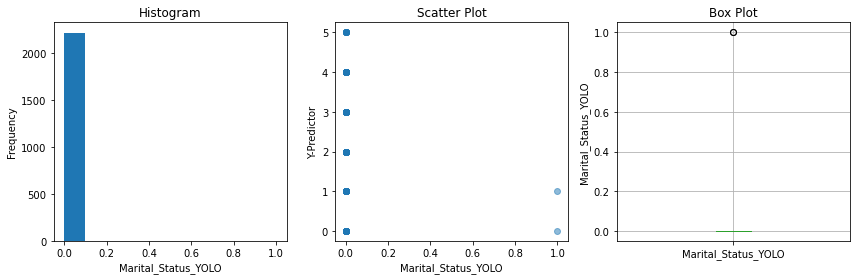

In [135]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting
for column in data.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    data[column].plot(kind='hist')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')

    # Scatter Plot
    plt.subplot(1, 3, 2)
    plt.scatter(data[column], data['Y-Predictor'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Y-Predictor')
    plt.title('Scatter Plot')

    # Box Plot
    plt.subplot(1, 3, 3)
    if data[column].dtype != 'object':
        data.boxplot(column=column)
        plt.ylabel(column)
        plt.title('Box Plot')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()




> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | Most of the Numerical Data Skews to the Right | Pre-processing should involve rebalancing and normalization/standardization for these features|
| Pattern 2 | The ordinal and nominal columns cannot generate box plots without error| These columns will likely need to undergo rank replacement or one-hot encoding|
| Pattern 3 | ID is unique for everyone so these is no pattern | This column can be dropped as it has no bearing on Y-Predictor|




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Nominal | Feature Engineer (Drop)|
Year_Birth         | Discrete | Normalization |      
Education          | Ordinal | Rank Replacement |       
Marital_Status     | Nominal | One-Hot Encoding |
Income             | Continuous | Normalization |      
Kidhome            | Discrete | Normalization |        
Teenhome           | Discrete | Normalization |   
Dt_Customer        | Nominal | Feature Engineer (D/M/Y) |      
Recency            | Discrete | Normalization |     
MntWines           | Continuous | Normalization |    
MntFruits          | Continuous | Normalization |    
MntMeatProducts    | Continuous | Normalization |     
MntFishProducts    | Continuous | Normalization |    
MntSweetProducts   | Continuous | Normalization |    
MntGoldProds       | Continuous | Normalization |
NumDealsPurchases  | Discrete | Normalization |  
NumWebPurchases    | Discrete | Normalization |
NumCatalogPurchases| Discrete | Normalization |
NumStorePurchases  | Discrete | Normalization |  
NumWebVisitsMonth  | Discrete | Normalization |  
AcceptedCmp3       | Nominal | Feature Engineer (Leave as-is) |  
AcceptedCmp4       | Nominal | Feature Engineer (Leave as-is) |     
AcceptedCmp5       | Nominal | Feature Engineer (Leave as-is) |     
AcceptedCmp1       | Nominal | Feature Engineer (Leave as-is) |     
AcceptedCmp2       | Nominal | Feature Engineer (Leave as-is) |     
Complain           | Nominal | Feature Engineer (Leave as-is) |     
Z_CostContact      | Continuous | Feature Engineer (Leave as-is) |     
Z_Revenue          | Continuous | Feature Engineer (Leave as-is) |          
Response           | Nominal | Feature Engineer (Leave as-is) |


>  Q2b. Perform the aforementioned Data Preprocessings

In [117]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# Split the 'Dt_Customer' column into day, month, and year columns
data[['DD_Customer', 'MM_Customer', 'YYYY_Customer']] = data['Dt_Customer'].str.split('-', expand=True)

# Convert the newly created columns to integers
data['DD_Customer'] = data['DD_Customer'].astype(int)
data['MM_Customer'] = data['MM_Customer'].astype(int)
data['YYYY_Customer'] = data['YYYY_Customer'].astype(int)


# Drop the unwanted columns
if 'Dt_Customer' in data.columns:
    data = data.drop('Dt_Customer', axis=1)

if 'DD_Customer' in data.columns:  #this line is just to prevent errors when re-running this block of code
    data = data.drop('DD_Customer',axis=1, errors='ignore')

if 'MM_Customer' in data.columns:  #this line is just to prevent errors when re-running this block of code
    data = data.drop('MM_Customer', axis=1, errors='ignore')

if 'ID' in data.columns:           #this line is just to prevent errors when re-running this block of code
    data = data.drop('ID',axis = 1, errors='ignore')

data.head()

# Rank Replacement for Education
education_rank = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

data['Education'] = data['Education'].map(education_rank)

# One Hot Encoding for Marital Status (not using OneHotEncoder because of constant errors)
data = pd.get_dummies(data, columns=['Marital_Status'], drop_first=True)
    
data.head()

# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                        'NumStorePurchases', 'NumWebVisitsMonth']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Round Y-Predictor to Nearest integer

data['Y-Predictor'] = data['Y-Predictor'].astype(int)

data.head()


,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Y-Predictor,YYYY_Customer,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.390625,3,0.483689,0.0,0.0,0.585859,0.517733,1.000000,0.980912,1.000000,...,1,1,2012,0,0,0,1,0,0,0
1,0.343750,3,0.382557,0.5,0.5,0.383838,0.008969,0.012579,0.010779,0.016598,...,0,0,2014,0,0,0,1,0,0,0
2,0.515625,3,0.599234,0.0,0.0,0.262626,0.347330,0.616352,0.228161,0.921162,...,0,0,2013,0,0,0,0,1,0,0
3,0.812500,3,0.213650,0.5,0.0,0.262626,0.008969,0.050314,0.035931,0.082988,...,0,0,2014,0,0,0,0,1,0,0
4,0.765625,5,0.485018,0.5,0.0,0.949495,0.141052,0.540881,0.211992,0.381743,...,0,0,2014,0,0,1,0,0,0,0




---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

>  Q3a. Generate Test/Training Data Split

In [118]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split # Import Train Test Split From Libraries

target_column = 'Y-Predictor'

# Separate the features and the target variable
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1772, 34)
X_test shape: (444, 34)
y_train shape: (1772,)
y_test shape: (444,)


> Q3b. Choose and deploy dataset to 3+ ML Model

In [119]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

For Random Forest Model: 

Confusion Matrix:


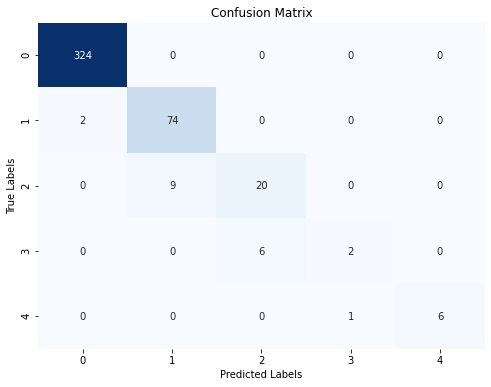

Accuracy: 0.9594594594594594
Recall:  0.9594594594594594
Precision:  0.9558836300095817
F1 Score:  0.9554206165526922

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       324
           1       0.89      0.97      0.93        76
           2       0.77      0.69      0.73        29
           3       0.67      0.25      0.36         8
           4       1.00      0.86      0.92         7

    accuracy                           0.96       444
   macro avg       0.86      0.75      0.79       444
weighted avg       0.96      0.96      0.96       444



No positive samples in y_true, true positive value should be meaningless


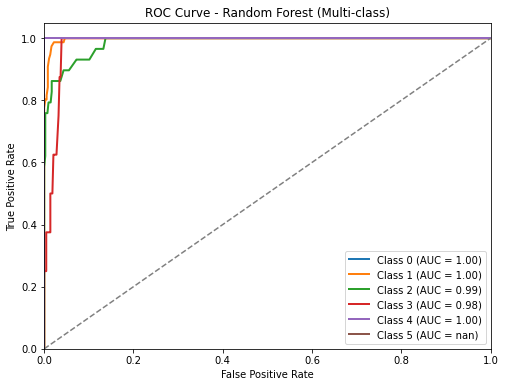

No positive samples in y_true, true positive value should be meaningless


For Decision Tree: 

Confusion Matrix:


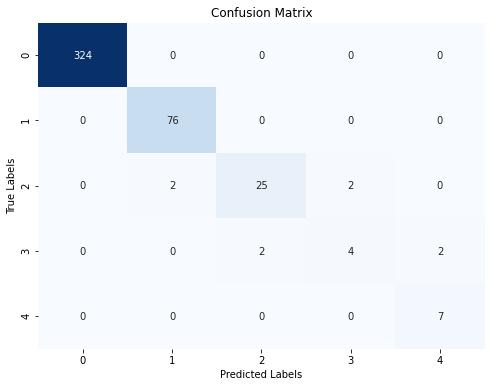

Accuracy: 0.9819819819819819
Recall:  0.9819819819819819
Precision:  0.9812633145966478
F1 Score:  0.9810861998361997

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.97      1.00      0.99        76
           2       0.93      0.86      0.89        29
           3       0.67      0.50      0.57         8
           4       0.78      1.00      0.88         7

    accuracy                           0.98       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.98      0.98      0.98       444



No positive samples in y_true, true positive value should be meaningless


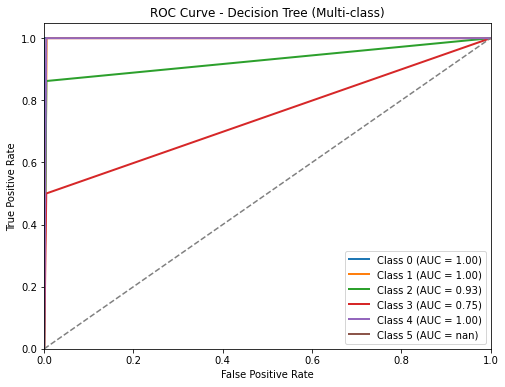

For GBC: 

Confusion Matrix:


No positive samples in y_true, true positive value should be meaningless


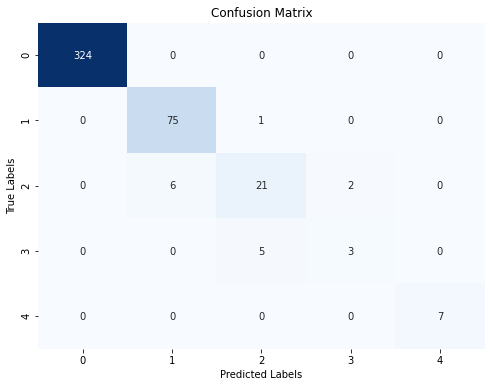

Accuracy: 0.9684684684684685
Recall:  0.9684684684684685
Precision:  0.965598932265599
F1 Score:  0.9663373258118481

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.93      0.99      0.96        76
           2       0.78      0.72      0.75        29
           3       0.60      0.38      0.46         8
           4       1.00      1.00      1.00         7

    accuracy                           0.97       444
   macro avg       0.86      0.82      0.83       444
weighted avg       0.97      0.97      0.97       444



No positive samples in y_true, true positive value should be meaningless


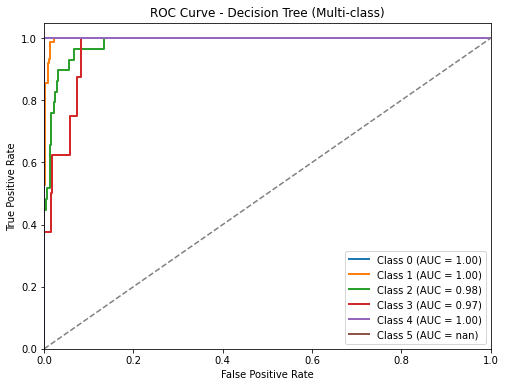

No positive samples in y_true, true positive value should be meaningless


In [121]:
#@title Q4a. Evaluate the Model's Accuracy

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import recall_score, precision_score, f1_score



                                            # Random Forest Model:

print("For Random Forest Model: ")

#Plot Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Export Confusion Matrix
conf_matrix_df = pd.DataFrame(cm, index=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
                              columns=['True 0', 'True 1', 'True 2', 'True 3', 'True 4'])
conf_matrix_df.to_csv('rfc_confusion_matrix.csv', index=True)


# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Recall: ", recall_score(y_test, y_pred_rf, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Export Evaluation Metrics
metrics_data = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    'Value': [accuracy_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_rf, average='weighted')]
})
metrics_data.to_csv('rfc_evaluation_metrics.csv', index=False)

# Multi-Class ROC Curve
y_prob_rf = rf.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i in range(len(rf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf.classes_[i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {rf.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-class)')
plt.legend(loc='lower right')
plt.show()

# Export Multi-Class ROC Curve
fpr_list, tpr_list, auc_list, class_list = [], [], [], []
for i in range(len(rf.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf.classes_[i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_list.extend(fpr)
    tpr_list.extend(tpr)
    auc_list.extend([roc_auc] * len(fpr))
    class_list.extend([f'Class {rf.classes_[i]}'] * len(fpr))
roc_data = pd.DataFrame({'False Positive Rate': fpr_list,
                         'True Positive Rate': tpr_list,
                         'AUC': auc_list,
                         'Class': class_list})
roc_data.to_csv('rfc_roc_curve.csv', index=False)



                                            # Decision Tree Model:

print("For Decision Tree: ")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Export Confusion Matrix
conf_matrix_df = pd.DataFrame(cm, index=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
                              columns=['True 0', 'True 1', 'True 2', 'True 3', 'True 4'])
conf_matrix_df.to_csv('dt_confusion_matrix.csv', index=True)


# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Recall: ", recall_score(y_test, y_pred_dt, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_dt, average='weighted'))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Export Evaluation Metrics
metrics_data = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    'Value': [accuracy_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_dt, average='weighted')]
})
metrics_data.to_csv('dt_evaluation_metrics.csv', index=False)

# Multi-Class ROC
y_prob_dt = dt.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i in range(len(dt.classes_)):
    fpr, tpr, _ = roc_curve(y_test == dt.classes_[i], y_prob_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {dt.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Multi-class)')
plt.legend(loc='lower right')
plt.show()

# Export Multi-Class ROC
fpr_list, tpr_list, auc_list, class_list = [], [], [], []
for i in range(len(dt.classes_)):
    fpr, tpr, _ = roc_curve(y_test == dt.classes_[i], y_prob_dt[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_list.extend(fpr)
    tpr_list.extend(tpr)
    auc_list.extend([roc_auc] * len(fpr))
    class_list.extend([f'Class {dt.classes_[i]}'] * len(fpr))
roc_data = pd.DataFrame({'False Positive Rate': fpr_list,
                         'True Positive Rate': tpr_list,
                         'AUC': auc_list,
                         'Class': class_list})
roc_data.to_csv('dt_roc_curve.csv', index=False)



                                            # Gradient Boosting Classifer:

print("For GBC: ")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Export Confusion Matrix
conf_matrix_df = pd.DataFrame(cm, index=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],
                              columns=['True 0', 'True 1', 'True 2', 'True 3', 'True 4'])
conf_matrix_df.to_csv('gbc_confusion_matrix.csv', index=True)

# Evaluation Metrics
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy_gbc)
print("Recall: ", recall_score(y_test, y_pred_gbc, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred_gbc, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_gbc, average='weighted'))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))

# Export Evaluation Metrics
metrics_data = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    'Value': [accuracy_score(y_test, y_pred_gbc), recall_score(y_test, y_pred_gbc, average='weighted'), precision_score(y_test, y_pred_gbc, average='weighted'), f1_score(y_test, y_pred_gbc, average='weighted')]
})
metrics_data.to_csv('gbc_evaluation_metrics.csv', index=False)

# Multi-Class ROC
y_prob_gbc = gbc.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i in range(len(gbc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == gbc.classes_[i], y_prob_gbc[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {gbc.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Multi-class)')
plt.legend(loc='lower right')
plt.show()

# Export Multi-Class ROC
fpr_list, tpr_list, auc_list, class_list = [], [], [], []
for i in range(len(gbc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == gbc.classes_[i], y_prob_gbc[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_list.extend(fpr)
    tpr_list.extend(tpr)
    auc_list.extend([roc_auc] * len(fpr))
    class_list.extend([f'Class {gbc.classes_[i]}'] * len(fpr))
roc_data = pd.DataFrame({'False Positive Rate': fpr_list,
                         'True Positive Rate': tpr_list,
                         'AUC': auc_list,
                         'Class': class_list})
roc_data.to_csv('gbc_roc_curve.csv', index=False)

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

I choose Model 2 (Decision Tree Classifier) because overall, its precision, accuracy, active recall and F1 scores out do the other models, indicating that it is the most suitable model of the three to generate reliable predictions from the dataset. 



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [47]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

best_accuracy = 0
best_max_depth_mhpt = None
best_min_samples_split_mhpt = None


# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

for max_depth in range(1, 11):
    for min_samples_split in range(2, 11):
        # Create a Decision Tree classifier model
        dt_manualhpt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

        # Train the model on the training data
        dt_manualhpt.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred_manualhpt = dt_manualhpt.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred_manualhpt)

        # Check if this combination of hyperparameters gives better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_max_depth_mhpt = max_depth
            best_min_samples_split_mhpt = min_samples_split

print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best Accuracy:", best_accuracy)

best_dt_model_mhpt = DecisionTreeClassifier(max_depth=best_max_depth_mhpt, min_samples_split=best_min_samples_split_mhpt)

Best max_depth: 9
Best min_samples_split: 3
Best Accuracy: 0.9954954954954955


>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [48]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11)
}


# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

best_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_dt_model.fit(X_train, y_train)

y_pred = best_dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best Accuracy:", accuracy)



Best max_depth: 9
Best min_samples_split: 3
Best Accuracy: 0.990990990990991


>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [49]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Step 2. Add ensembling methods on top of Base models
base_model1 = GradientBoostingClassifier(random_state=42)
base_model2 = RandomForestClassifier(random_state=42)
base_model3 = DecisionTreeClassifier()

stacking_model = StackingClassifier(
    estimators=[('model1', base_model1), ('model2', base_model2), ('model3', base_model3)],
    final_estimator=DecisionTreeClassifier()
)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
stacking_model.fit(X_train, y_train)
stacking_y_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_y_pred)
print("Accuracy with Stacking Ensemble:", stacking_accuracy)

Accuracy with Stacking Ensemble: 0.9887387387387387




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

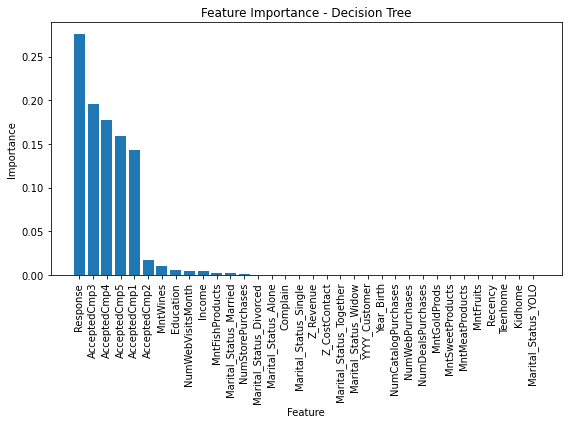

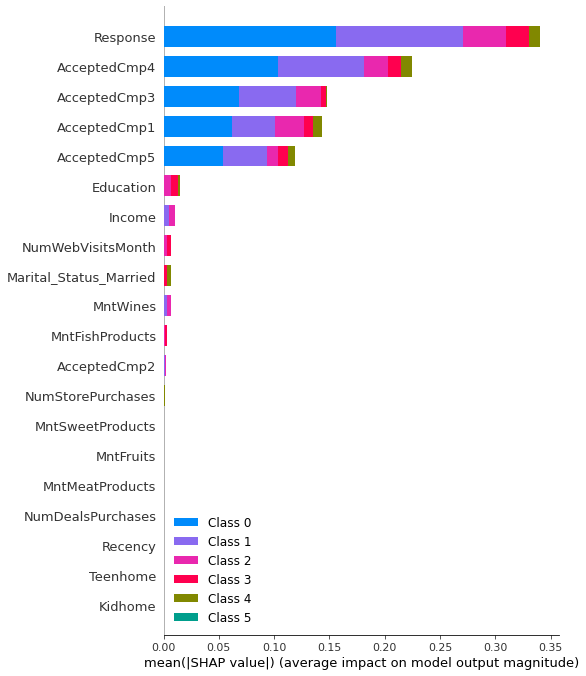

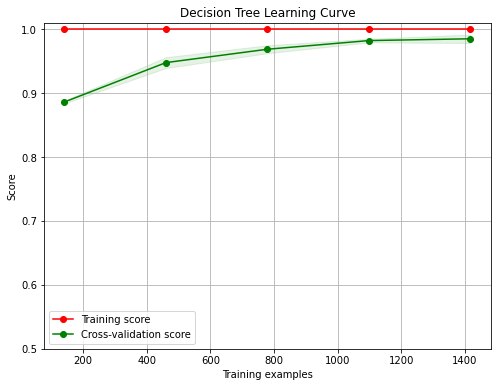

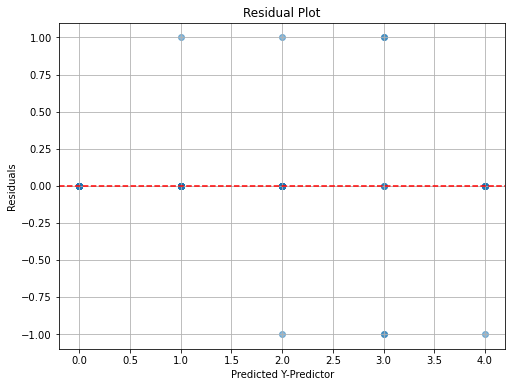

In [133]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import shap
from sklearn.model_selection import learning_curve

# Feature Importance

feature_importances = dt.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Export
importance_df.to_csv('feature_importance.csv', index=False)

# SHAP

explainer_shap = shap.Explainer(dt, X_train)
shap_values = explainer_shap.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Export
shap_values_flat = np.vstack(shap_values)
shap_df = pd.DataFrame(shap_values_flat, columns=X_test.columns)
shap_df.to_csv('shap_values.csv', index=False)

# Learning Curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    return plt

plot_learning_curve(
    dt,
    "Decision Tree Learning Curve",
    X_train,
    y_train,
    ylim=(0.5, 1.01),
    cv=5,
)
plt.show()

#Export
def get_learning_curve_data(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    # Calculate mean and standard deviation for train and test scores across different folds
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    return train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std
train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = get_learning_curve_data(dt_model, X_train, y_train, cv=5)
learning_curve_df = pd.DataFrame({
    'Training Examples': train_sizes.repeat(5),
    'Training Score': train_scores_mean.repeat(5),
    'Training Score Std': train_scores_std.repeat(5),
    'Cross-validation Score': test_scores_mean.repeat(5),
    'Cross-validation Score Std': test_scores_std.repeat(5),
})
learning_curve_df.to_csv('learning_curve_data.csv', index=False)


# Plot the Residual Plot

residuals = y_test - y_pred_dt
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Y-Predictor')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

#Export
residual_plot_data = pd.DataFrame({'Predicted Y-Predictor': y_pred, 'Residuals': residuals})
residual_plot_data.to_csv('residual_plot_data.csv', index=False)

In [134]:
# Overall, the model is quite precise and accurate. This, despite the important features being relatively concetrated
# A limitation of the model, however, is that it cannot correctly predict values that are 5 for 'Y-Predictor' despite
# the code being revisted and corrected multiple times. 



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)

